This dataset contains an enormous number of anonymized patient-related information including pre-conditions. 
The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features
, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.¶
=----------------------------------------------------------------------------
d

Code (21)

Discussion (3)

New Notebook

Download (5 MB)

About Dataset
Context
Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.

The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

content
The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

sex: 1 for female and 2 for male.
age: of the patient.
classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
pneumonia: whether the patient already have air sacs inflammation or not.
pregnancy: whether the patient is pregnant or not.
diabetes: whether the patient has diabetes or not.
copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
asthma: whether the patient has asthma or not.
inmsupr: whether the patient is immunosuppressed or not.
hypertension: whether the patient has hypertension or not.
cardiovascular: whether the patient has heart or blood vessels related disease.
renal chronic: whether the patient has chronic renal disease or not.
other disease: whether the patient has other disease or not.
obesity: whether the patient is obese or not.
tobacco: whether the patient is a tobacco user.
usmr: Indicates whether the patient treated medical units of the first, second or third level.
medical unit: type of institution of the National Health System that provided the care.
intubed: whether the patient was connected to the ventilator.
icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df=pd.read_csv('Covid Data.csv')

In [3]:
df.shape

(1048575, 21)

In [4]:
df.duplicated().sum()

812049

In [5]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [6]:
df['PREGNANT'].value_counts

<bound method IndexOpsMixin.value_counts of 0           2
1          97
2          97
3           2
4          97
           ..
1048570    97
1048571    97
1048572    97
1048573    97
1048574    97
Name: PREGNANT, Length: 1048575, dtype: int64>

In [7]:
df['PREGNANT'].unique()

array([ 2, 97, 98,  1], dtype=int64)

In [8]:
df['DIABETES'].unique()

array([ 2,  1, 98], dtype=int64)

In [9]:
df['COPD'].unique()

array([ 2,  1, 98], dtype=int64)

In [10]:
df['ASTHMA'].unique()

array([ 2,  1, 98], dtype=int64)

In [11]:
df['INMSUPR'].unique()

array([ 2,  1, 98], dtype=int64)

In [12]:
df['RENAL_CHRONIC'].unique()

array([ 2,  1, 98], dtype=int64)

In [13]:
df['OBESITY'].unique()

array([ 2,  1, 98], dtype=int64)

In [14]:
df['MEDICAL_UNIT'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64)

In [15]:
df['USMER'].unique()

array([2, 1], dtype=int64)

In [16]:
df['INTUBED'].unique()

array([97,  1,  2, 99], dtype=int64)

In [17]:
df['ICU'].unique()

array([97,  2,  1, 99], dtype=int64)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [19]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

# its clean data
but null values are 97,98

In [20]:
df.rename(columns=lambda x:x.lower(),inplace=True)

In [21]:
df.head()

,usmer,medical_unit,sex,patient_type,date_died,intubed,pneumonia,age,pregnant,diabetes,...,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [22]:
# find number of woman that is pregnant and this virus is danger on their life
mask=df['pregnant']==1
df[mask]

,usmer,medical_unit,sex,patient_type,date_died,intubed,pneumonia,age,pregnant,diabetes,...,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
969,2,3,1,2,13/06/2020,1,1,23,1,2,...,2,2,2,2,2,1,2,2,3,1
1735,1,3,1,2,28/07/2020,1,1,30,1,2,...,2,2,2,2,2,2,2,2,3,1
1787,2,3,1,2,08/08/2020,2,1,33,1,2,...,2,2,2,1,2,2,2,2,3,2
1856,1,3,1,1,9999-99-99,97,2,57,1,2,...,2,2,1,2,2,1,2,2,1,97
1903,2,3,1,2,9999-99-99,1,1,25,1,2,...,2,2,2,2,2,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048150,1,13,1,2,9999-99-99,99,99,17,1,2,...,1,2,2,2,2,2,2,2,7,99
1048327,2,13,1,2,9999-99-99,2,2,26,1,2,...,2,2,2,1,2,2,2,2,7,2
1048331,2,13,1,2,9999-99-99,2,2,22,1,2,...,2,2,2,1,2,2,2,2,7,2
1048336,2,13,1,2,9999-99-99,2,2,22,1,2,...,2,2,2,2,2,2,2,2,7,2


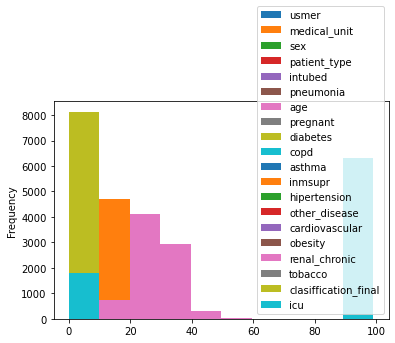

In [23]:
df[mask].plot.hist()
plt.show()

In [24]:
#Parsing of date
df['date_parsed']=pd.to_datetime(df['date_died'][df['date_died']!="9999-99-99"], format="%d/%m/%Y")

In [25]:
df['death']=[2 if each=='9999-99-99' else 1 for each in df['date_died'] ]

In [26]:
df['day']=df['date_parsed'].dt.day
df['month']=df['date_parsed'].dt.month
df['year']=df['date_parsed'].dt.year
df

,usmer,medical_unit,sex,patient_type,date_died,intubed,pneumonia,age,pregnant,diabetes,...,obesity,renal_chronic,tobacco,clasiffication_final,icu,date_parsed,death,day,month,year
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,2,3,97,2020-05-03,1,3.0,5.0,2020.0
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,1,1,2,5,97,2020-06-03,1,3.0,6.0,2020.0
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,3,2,2020-06-09,1,9.0,6.0,2020.0
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,7,97,2020-06-12,1,12.0,6.0,2020.0
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,2,3,97,2020-06-21,1,21.0,6.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,7,97,NaT,2,NaN,NaN,NaN
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,2,7,2,NaT,2,NaN,NaN,NaN
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,7,97,NaT,2,NaN,NaN,NaN
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,7,97,NaT,2,NaN,NaN,NaN


In [27]:
del df['date_died']

In [28]:
df.head()

,usmer,medical_unit,sex,patient_type,intubed,pneumonia,age,pregnant,diabetes,copd,...,obesity,renal_chronic,tobacco,clasiffication_final,icu,date_parsed,death,day,month,year
0,2,1,1,1,97,1,65,2,2,2,...,2,2,2,3,97,2020-05-03,1,3.0,5.0,2020.0
1,2,1,2,1,97,1,72,97,2,2,...,1,1,2,5,97,2020-06-03,1,3.0,6.0,2020.0
2,2,1,2,2,1,2,55,97,1,2,...,2,2,2,3,2,2020-06-09,1,9.0,6.0,2020.0
3,2,1,1,1,97,2,53,2,2,2,...,2,2,2,7,97,2020-06-12,1,12.0,6.0,2020.0
4,2,1,2,1,97,2,68,97,1,2,...,2,2,2,3,97,2020-06-21,1,21.0,6.0,2020.0


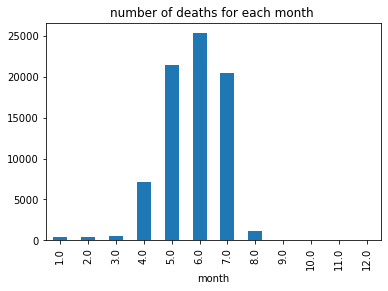

In [29]:
#number of deaths for each month
df.groupby('month')['death'].count().plot(kind='bar')
plt.title('number of deaths for each month ')
plt.show()

In [30]:
# note that months may,june and july were the largest number of deaths
def elderly(n):
    if n>66:
        return(1)
    else:
        return(2)

In [31]:
#here i want to get the eldery people and how this virus affect on their life
df['elderly']=df['age'].apply(elderly)

In [32]:
df

,usmer,medical_unit,sex,patient_type,intubed,pneumonia,age,pregnant,diabetes,copd,...,renal_chronic,tobacco,clasiffication_final,icu,date_parsed,death,day,month,year,elderly
0,2,1,1,1,97,1,65,2,2,2,...,2,2,3,97,2020-05-03,1,3.0,5.0,2020.0,2
1,2,1,2,1,97,1,72,97,2,2,...,1,2,5,97,2020-06-03,1,3.0,6.0,2020.0,1
2,2,1,2,2,1,2,55,97,1,2,...,2,2,3,2,2020-06-09,1,9.0,6.0,2020.0,2
3,2,1,1,1,97,2,53,2,2,2,...,2,2,7,97,2020-06-12,1,12.0,6.0,2020.0,2
4,2,1,2,1,97,2,68,97,1,2,...,2,2,3,97,2020-06-21,1,21.0,6.0,2020.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,40,97,2,2,...,2,2,7,97,NaT,2,NaN,NaN,NaN,2
1048571,1,13,2,2,2,2,51,97,2,2,...,2,2,7,2,NaT,2,NaN,NaN,NaN,2
1048572,2,13,2,1,97,2,55,97,2,2,...,2,2,7,97,NaT,2,NaN,NaN,NaN,2
1048573,2,13,2,1,97,2,28,97,2,2,...,2,2,7,97,NaT,2,NaN,NaN,NaN,2


In [33]:
df['elderly'].value_counts()

2    960468
1     88107
Name: elderly, dtype: int64

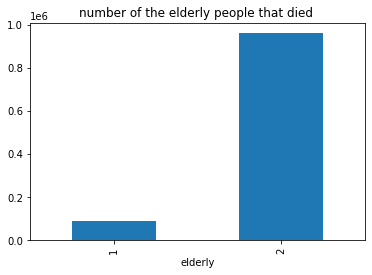

In [34]:
df.groupby('elderly')['death'].count().plot(kind='bar')
plt.title('number of the elderly people that died ')
plt.show()

In [35]:
# show number of children that died from corona virus
mask1=df['age']<16
mask2=df['death']==1

df_deat_child=df[mask1 & mask2]

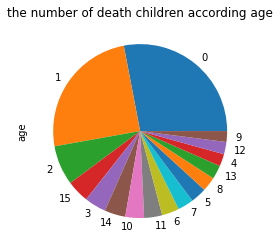

In [36]:
df_deat_child=df[mask1 & mask2]
df_deat_child['age'].value_counts().plot(kind='pie')
plt.title('the number of death children according age')
plt.show()

In [37]:
# note that children whi died are babies

In [38]:
# find the percantage of that death of children
percantage=df[mask1 & mask2].age.count()/df[df['age']<16].age.count()*100

print("percentage of children died from covid = {}%".format("%.2f"%percantage))

percentage of children died from covid = 1.62%


In [39]:
df[df['pregnant']==97].sex.value_counts()

2    523511
Name: sex, dtype: int64

In [40]:
df['pregnant'].value_counts()

97    523511
2     513179
1       8131
98      3754
Name: pregnant, dtype: int64

In [41]:
#note that 97 refer to men so we will replace 97 by value 2
df['pregnant'].replace(97,2,inplace=True)

In [42]:
# make acopy of data because i want to delet some columns
newdf=df.copy()
del df['month'],df['day'],df['year']

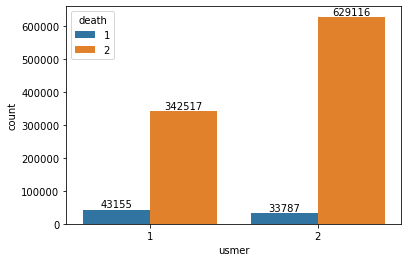

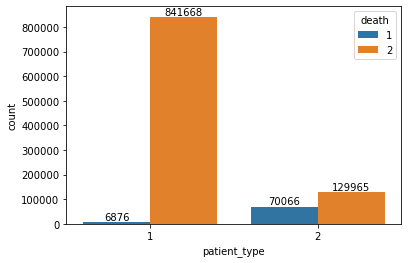

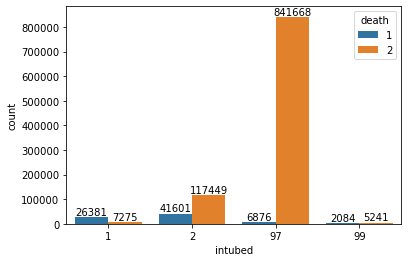

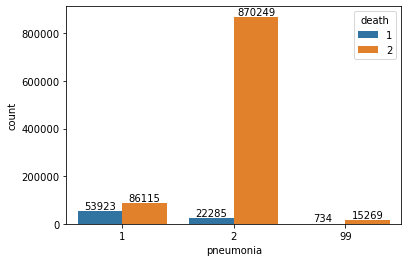

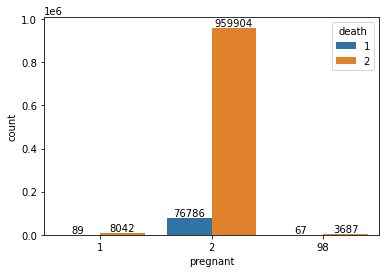

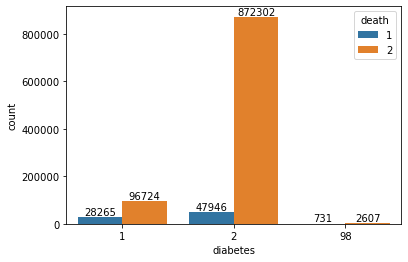

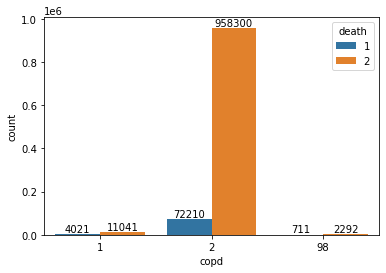

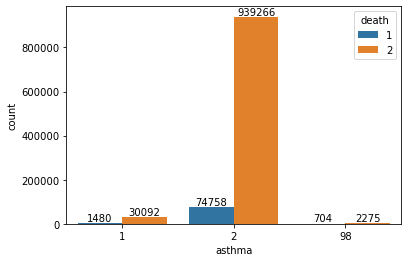

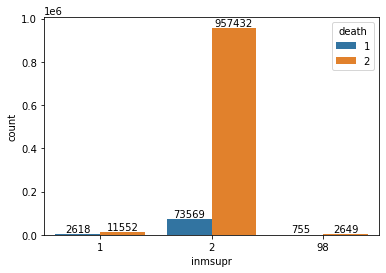

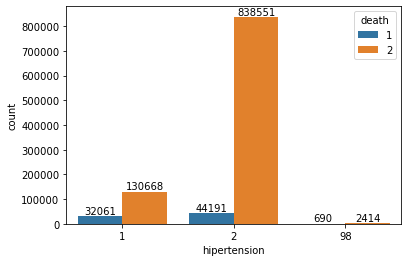

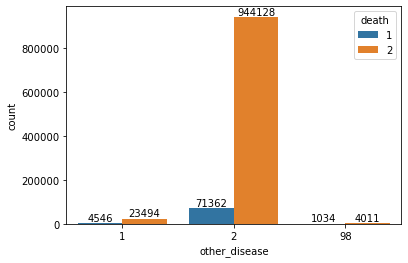

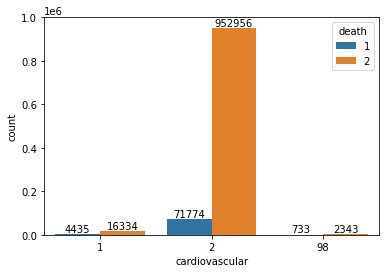

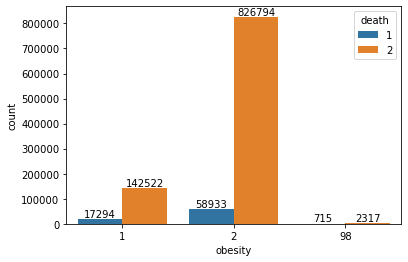

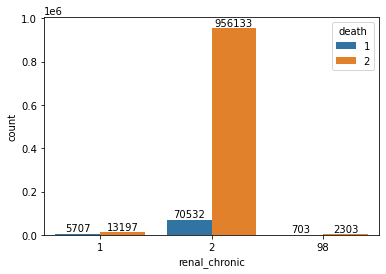

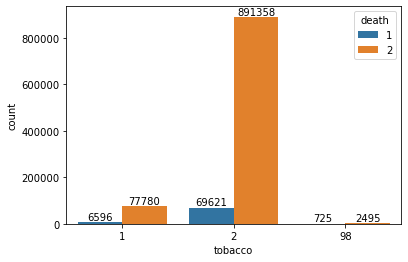

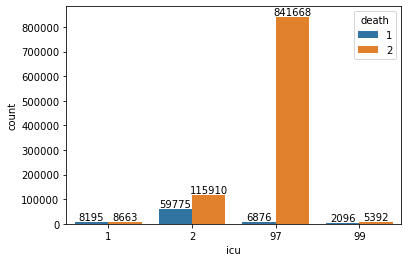

In [43]:
for i in df.loc[: ,~df.columns.isin(["date_parsed", "age",'death','medical_unit','clasiffication_final','elderly','sex'])]:
    ax=sns.countplot(df[i],hue=df.death)
    plt.bar_label(ax.containers[0])
    plt.bar_label(ax.containers[1])
    plt.show()

In [44]:


# most people who  death have pneumonia diabetes,copd,renal_chronic,inyubed ndiabets,and obesity
# most of patient who used tobacco death from covid19


percentage of null values of intubed are: 
97    80.923539
99     0.698567
Name: intubed, dtype: float64


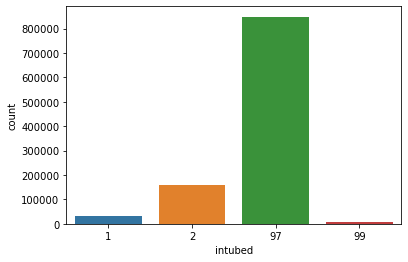

percentage of null values of pneumonia are: 
99    1.526166
Name: pneumonia, dtype: float64


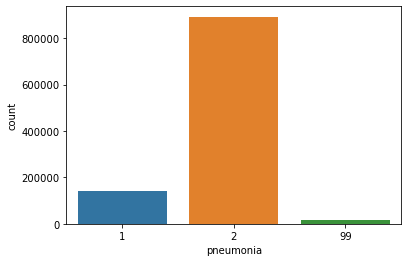

percentage of null values of pregnant are: 
98    0.35801
Name: pregnant, dtype: float64


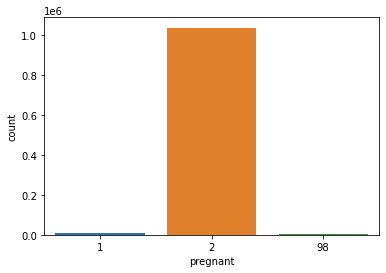

percentage of null values of diabetes are: 
98    0.318337
Name: diabetes, dtype: float64


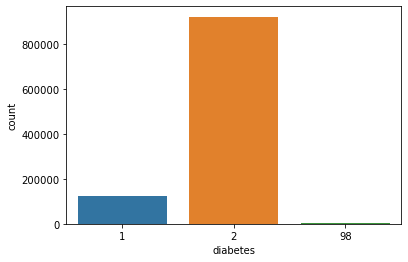

percentage of null values of copd are: 
98    0.286389
Name: copd, dtype: float64


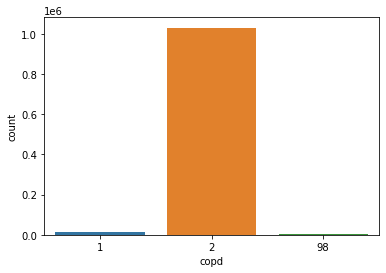

percentage of null values of asthma are: 
98    0.2841
Name: asthma, dtype: float64


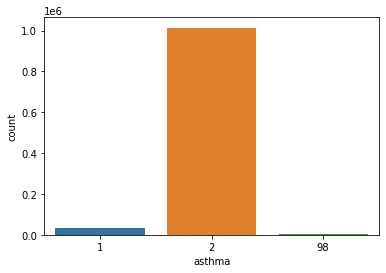

percentage of null values of inmsupr are: 
98    0.324631
Name: inmsupr, dtype: float64


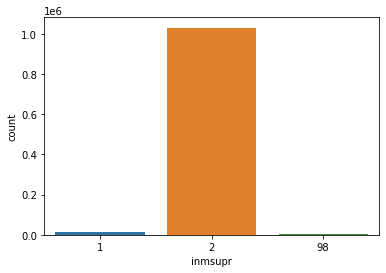

percentage of null values of hipertension are: 
98    0.296021
Name: hipertension, dtype: float64


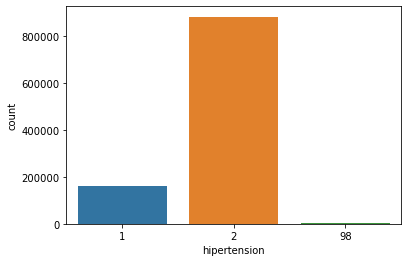

percentage of null values of other_disease are: 
98    0.481129
Name: other_disease, dtype: float64


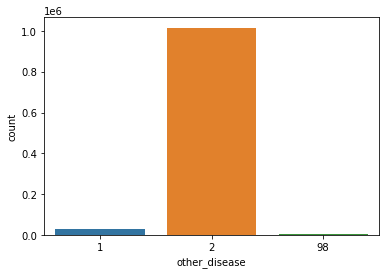

percentage of null values of cardiovascular are: 
98    0.29335
Name: cardiovascular, dtype: float64


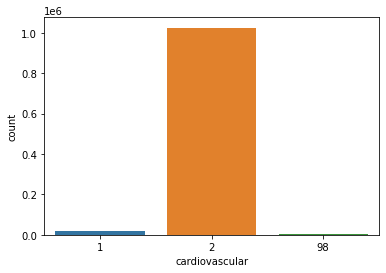

percentage of null values of obesity are: 
98    0.289154
Name: obesity, dtype: float64


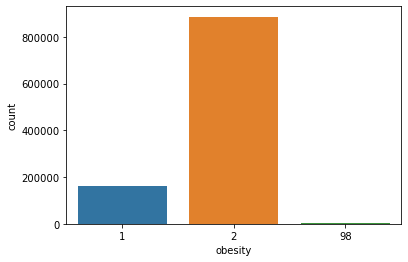

percentage of null values of renal_chronic are: 
98    0.286675
Name: renal_chronic, dtype: float64


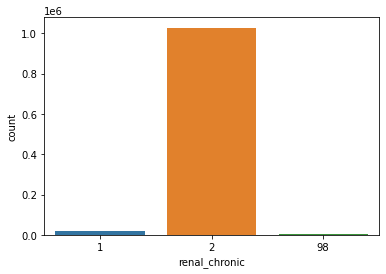

percentage of null values of tobacco are: 
98    0.307083
Name: tobacco, dtype: float64


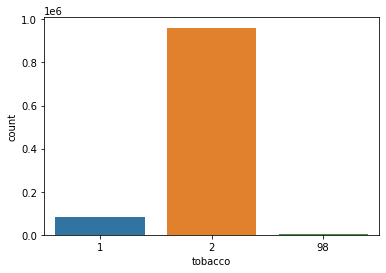

percentage of null values of icu are: 
97    80.923539
99     0.714112
Name: icu, dtype: float64


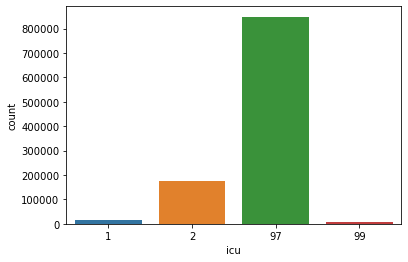

In [45]:
#check null values i each row and calculation of percentage of null values
for i in df.loc[:, ~df.columns.isin(["date_parsed","age", "medical_unit", "clasiffication_final"])]:
    
    null=df[i][(df[i]!=1)&(df[i]!=2)].value_counts() 
    if null.any():
        
        pe = (null/1048575)*100
        print("percentage of null values of {} are: \n{}".format(i,pe))           
        sns.countplot(df[i])
        plt.show()

In [46]:
# i will remove intubed and icu because they have alot of nulls
del df['intubed'],df['icu']

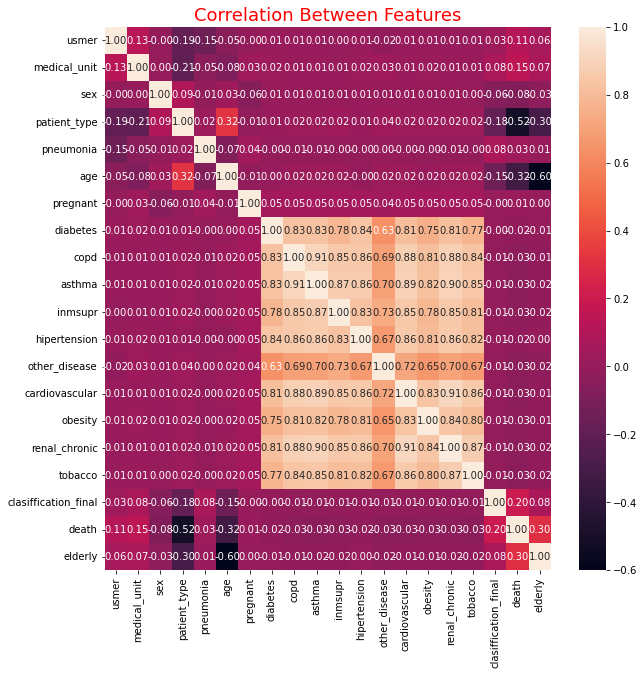

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, fmt=".2f")
plt.title("Correlation Between Features",fontsize=18,color="red");

there is areleation btween diabetes and hipertension,asthma and copd so i will remove them because of data noisy

In [48]:

del df['hipertension'],df['copd'],df['asthma'],df['elderly']

In [49]:
del df['tobacco']

# preparing the data for machine learning

## ---steps of machine learning--

1- gathering data

2-replace data types put each column is suitable type

2-check and inmpute the nulls

3-feature selection

encoding the features

4-make sure its balanced dataset

5-splitting for the data===>train_test_split

6-model selection


here====> we deal with supervised machine learning

--- imaen that we know the features and the target---

## feature selection

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   usmer                 1048575 non-null  int64         
 1   medical_unit          1048575 non-null  int64         
 2   sex                   1048575 non-null  int64         
 3   patient_type          1048575 non-null  int64         
 4   pneumonia             1048575 non-null  int64         
 5   age                   1048575 non-null  int64         
 6   pregnant              1048575 non-null  int64         
 7   diabetes              1048575 non-null  int64         
 8   inmsupr               1048575 non-null  int64         
 9   other_disease         1048575 non-null  int64         
 10  cardiovascular        1048575 non-null  int64         
 11  obesity               1048575 non-null  int64         
 12  renal_chronic         1048575 non-null  in

In [51]:
df['pregnant'].unique()

array([ 2, 98,  1], dtype=int64)

In [52]:
del df['pregnant']

In [53]:
del df['date_parsed']

# replace data types
## set each column in suitable data type

In [54]:
df["medical_unit"]=df["medical_unit"].astype('object')
df["clasiffication_final"]=df["clasiffication_final"].astype('object')

In [55]:
df['usmer']=df['usmer'].astype('object')
df['sex']=df['sex'].astype('object')
df['patient_type']=df['patient_type'].astype('object')
df['pneumonia']=df['pneumonia'].astype('object')
df['diabetes']=df['diabetes'].astype('object')
df['inmsupr']=df['inmsupr'].astype('object')
df['other_disease']=df['other_disease'].astype('object')
df['cardiovascular']=df['cardiovascular'].astype('object')
df['obesity']=df['obesity'].astype('object')


In [56]:
df['death']=df['death'].astype('object')

In [57]:
df['renal_chronic']=df['renal_chronic'].astype('object')

## 2-check and impute nulls 

In [58]:
df.describe()

,age
count,1.048575e+06
mean,4.179410e+01
std,1.690739e+01
min,0.000000e+00
25%,3.000000e+01
50%,4.000000e+01
75%,5.300000e+01
max,1.210000e+02


In [59]:
df.describe(include='O')

,usmer,medical_unit,sex,patient_type,pneumonia,diabetes,inmsupr,other_disease,cardiovascular,obesity,renal_chronic,clasiffication_final,death
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575
unique,2,13,2,2,3,3,3,3,3,3,3,7,2
top,2,12,1,1,2,2,2,2,2,2,2,7,2
freq,662903,602995,525064,848544,892534,920248,1031001,1015490,1024730,885727,1026665,499250,971633


In [60]:
df['usmer'].unique() # there is not null value

array([2, 1], dtype=object)

In [61]:
df['medical_unit'].unique() # there is not null

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype=object)

In [62]:
df['sex'].unique() # there is not null

array([1, 2], dtype=object)

In [63]:
df['patient_type'].unique() # there is not null

array([1, 2], dtype=object)

In [64]:
df['patient_type'].unique() # there is not null

array([1, 2], dtype=object)

In [65]:
df['pneumonia'].unique() # there is  null value equal 99

array([1, 2, 99], dtype=object)

In [66]:
# we should replace each 99 with the top value
df['pneumonia'].replace(99,2,inplace=True)

In [67]:
df['diabetes'].unique() # there is  null value equal 98

array([2, 1, 98], dtype=object)

In [68]:
# we should replace each 99 with the top value
df['pneumonia'].replace(98,2,inplace=True)

In [69]:
df['inmsupr'].unique() # there is  null value equal 98

array([2, 1, 98], dtype=object)

In [70]:
# we should replace each 98 with the top value
df['inmsupr'].replace(98,2,inplace=True)

In [71]:
df['other_disease'].unique() # there is  null value equal 98

array([2, 1, 98], dtype=object)

In [72]:
# we should replace each 98 with the top value
df['inmsupr'].replace(98,2,inplace=True)

In [73]:
df['cardiovascular'].unique() # there is  null value equal 98

array([2, 1, 98], dtype=object)

In [74]:
# we should replace each 98 with the top value
df['cardiovascular'].replace(98,2,inplace=True)

In [75]:
df['obesity'].unique() # there is  null value equal 98

array([2, 1, 98], dtype=object)

In [76]:
# we should replace each 98 with the top value
df['obesity'].replace(98,2,inplace=True)

In [77]:
df['renal_chronic'].unique() # there is  null value equal 98

array([2, 1, 98], dtype=object)

In [78]:
# we should replace each 98 with the top value
df['renal_chronic'].replace(98,2,inplace=True)

In [79]:
 df['clasiffication_final'].unique() #hasnt nulls

array([3, 5, 7, 6, 1, 2, 4], dtype=object)

# Encoding categorical

# one hot encoder (OHE)

In [80]:
cat_col=list(df.describe(include='O').columns)
df=pd.get_dummies(df,cat_col,drop_first=True)
df

,pneumonia,age,inmsupr,cardiovascular,obesity,renal_chronic,usmer_2,medical_unit_2,medical_unit_3,medical_unit_4,...,diabetes_98,other_disease_2,other_disease_98,clasiffication_final_2,clasiffication_final_3,clasiffication_final_4,clasiffication_final_5,clasiffication_final_6,clasiffication_final_7,death_2
0,1,65,2,2,2,2,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,1,72,2,2,1,1,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,2,55,2,2,2,2,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,2,53,2,2,2,2,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,2,68,2,2,2,2,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,40,2,2,2,2,1,0,0,0,...,0,1,0,0,0,0,0,0,1,1
1048571,2,51,2,2,2,2,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
1048572,2,55,2,2,2,2,1,0,0,0,...,0,1,0,0,0,0,0,0,1,1
1048573,2,28,2,2,2,2,1,0,0,0,...,0,1,0,0,0,0,0,0,1,1


In [81]:
X=df.drop('death_2',axis=1) # features

In [82]:
y=df['death_2'].values # target

# here we will check if data set is balanced or not balanced

<AxesSubplot:ylabel='count'>

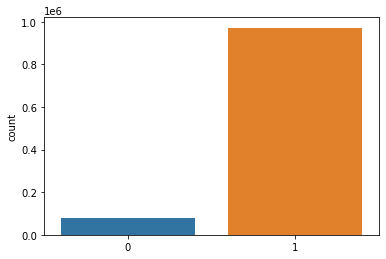

In [83]:
sns.countplot(y)

its is inplanced data set 

we must make smote for dataset to make it balanced dataset

# make scaling for feautres in order to be numbers from 0 to 1

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)


# make spliting for dataset into train and test

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=1)

In [86]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train_smote ,y_train_smote=smote.fit_resample(X_train,y_train)

<AxesSubplot:ylabel='count'>

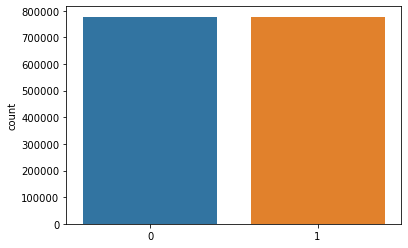

In [87]:
sns.countplot(y_train_smote)

became balanced data set

we will work with x_tarin_smote as features nd y_train_smote as atarget

 #      -----now we will make model selection-------

## 1-Descission tree model

In [88]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [89]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train_smote,y_train_smote)
y_train_pred=model.predict(X_train_smote)
print('training accuracy',accuracy_score(y_train_pred,y_train_smote))
y_pred=model.predict(X_test)
print('testing accuracy',accuracy_score(y_pred,y_test))

training accuracy 0.9640462085689109
testing accuracy 0.9132823117087476


In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.90      0.57     15427
           1       0.99      0.90      0.94    194288

    accuracy                           0.90    209715
   macro avg       0.70      0.90      0.76    209715
weighted avg       0.95      0.90      0.92    209715



# 2-naive_bayes

In [90]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train_smote,y_train_smote)
y_train_pred=model.predict(X_train_smote)
print('training accuracy',accuracy_score(y_train_pred,y_train_smote))
y_pred=model.predict(X_test)
print('testing accuracy',accuracy_score(y_pred,y_test))

training accuracy 0.6867227550186854
testing accuracy 0.8984431251937153


there is correlation between the features

# 3-LogisticRegression

 this model deal with  supervised classification 

In [104]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train_smote,y_train_smote)
y_train_pred=lg.predict(X_train_smote)
y_pred=lg.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


C:\Users\xps\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.41      0.92      0.56     15427
           1       0.99      0.89      0.94    194288

    accuracy                           0.90    209715
   macro avg       0.70      0.91      0.75    209715
weighted avg       0.95      0.90      0.91    209715

[[ 14176   1251]
 [ 20736 173552]]


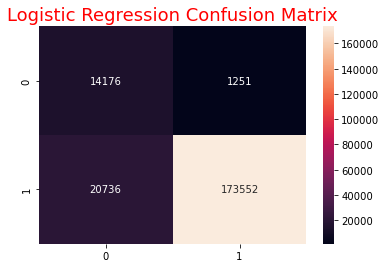

In [92]:
sns.heatmap(confusion_matrix(y_test, lg.predict(X_test)), annot=True, fmt=".0f")
plt.title("Logistic Regression Confusion Matrix",fontsize=18, color="red");

accuracy is 90

In [93]:
!pip install lightgbm

# 4-lightgbm model

it deal with large dataset and it is fast

In [95]:
 
import lightgbm as ltb
model = ltb.LGBMClassifier()
model.fit(X_train_smote, y_train_smote)
print(); print(model)
    
expected_y  = y_test
    
predicted_y = model.predict(X_test)
print(classification_report(expected_y, predicted_y))



LGBMClassifier()
              precision    recall  f1-score   support

           0       0.40      0.94      0.56     15427
           1       0.99      0.89      0.94    194288

    accuracy                           0.89    209715
   macro avg       0.70      0.91      0.75    209715
weighted avg       0.95      0.89      0.91    209715



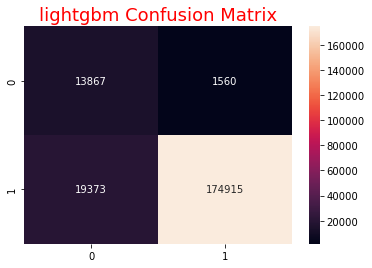

In [97]:
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt=".0f")
plt.title("lightgbm Confusion Matrix",fontsize=18, color="red");

  note that===> logistic regression is more accuracy than ligtlgm

# 5-AdaBoostClassifier

In [98]:
# it is fast,simple and easy algorithm it deal with numeric and text dataset
from sklearn.ensemble import AdaBoostClassifier
adabos=AdaBoostClassifier(n_estimators=100)
adabos.fit(X_train_smote,y_train_smote)
y_pred=adabos.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.42      0.90      0.57     15427
           1       0.99      0.90      0.94    194288

    accuracy                           0.90    209715
   macro avg       0.70      0.90      0.76    209715
weighted avg       0.95      0.90      0.92    209715



Note that=====> recall of adaboost model is greater than recall of logisticregression
here we interested in class 1 beacaues it is medical classification

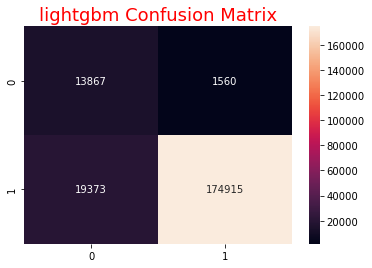

In [99]:
sns.heatmap(confusion_matrix(y_test, adabos.predict(X_test)), annot=True, fmt=".0f")
plt.title("lightgbm Confusion Matrix",fontsize=18, color="red");

training accuracy 0.9639149926995092
testing accuracy 0.9001835824809861
              precision    recall  f1-score   support

           0       0.42      0.90      0.57     15427
           1       0.99      0.90      0.94    194288

    accuracy                           0.90    209715
   macro avg       0.70      0.90      0.76    209715
weighted avg       0.95      0.90      0.92    209715

[[ 13867   1560]
 [ 19373 174915]]


the best algorithm for this case is adaboost model

<function matplotlib.pyplot.show(close=None, block=None)>

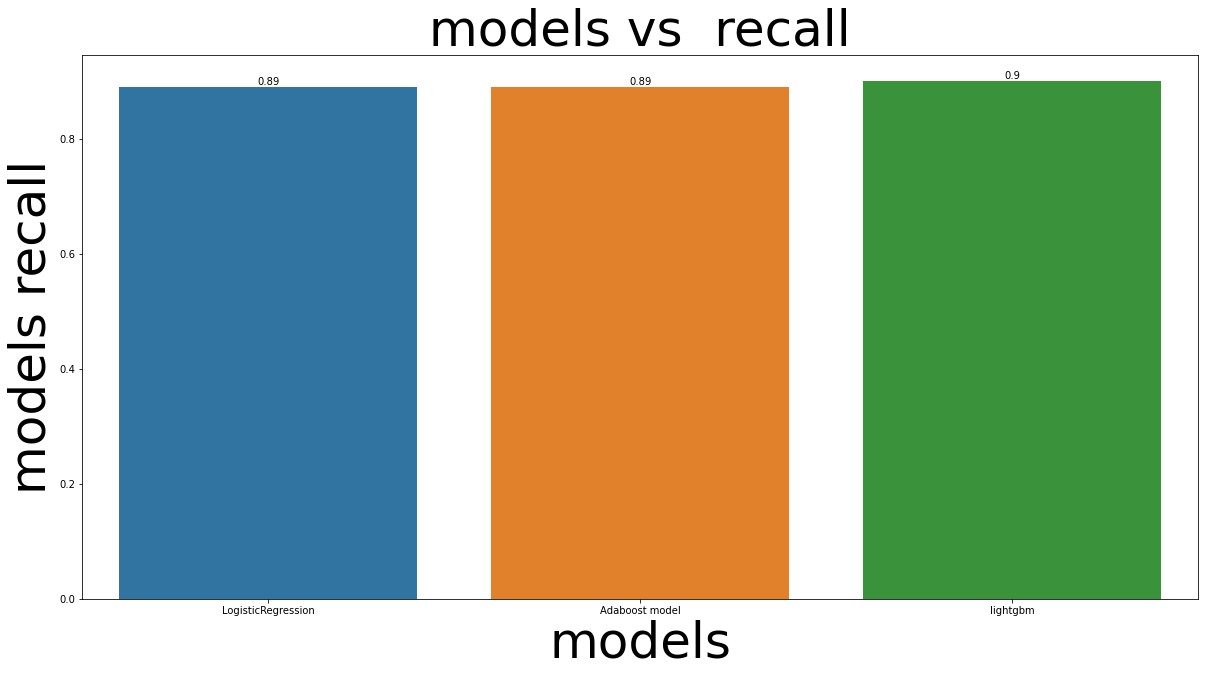

In [108]:
accuracy=pd.DataFrame(
data={'models':['LogisticRegression','Adaboost model','lightgbm'],
      'recall_to_class1':[.89,.89,.90]
    
})
plt.figure(figsize=(20,10))
ax=sns.barplot(x='models',y='recall_to_class1',data=accuracy)
plt.bar_label(ax.containers[0])
plt.title('models vs  recall',fontsize=50)
plt.xlabel('models',fontsize=50)
plt.ylabel('models recall',fontsize=50)
plt.show

there is another algorithms such as  
--xgboost
--GradientBoostingClassifier
--randomforest classifier
but they take much time in this case because its large data set